Women's World Cup Analysis

In [1]:
# Installing the required packages

#pip install statsbombpy
#pip install mplsoccer
#pip install highlight_text

In [2]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

In [3]:
#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [4]:
# Filter for female competitions to check what is available

female_comps = free_comps[free_comps['competition_gender']=='female']
female_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
25,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
26,37,42,England,FA Women's Super League,female,False,False,2019/2020,2024-02-12T15:05:34.211400,2021-06-13T16:17:31.694,None,2024-02-12T15:05:34.211400
27,37,4,England,FA Women's Super League,female,False,False,2018/2019,2024-06-12T07:41:45.347457,2021-06-13T16:17:31.694,None,2024-06-12T07:41:45.347457
63,49,3,United States of America,NWSL,female,False,False,2018,2023-07-24T13:01:22.094587,2021-06-13T16:17:31.694,None,2023-07-24T13:01:22.094587
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596
73,72,30,International,Women's World Cup,female,False,True,2019,2024-02-13T09:41:26.379767,2021-06-13T16:17:31.694,None,2024-02-13T09:41:26.379767


In [5]:
# filter for the last world cup

last_wwc = female_comps[(female_comps['competition_name']=="Women's World Cup") & (female_comps['season_name']=='2023')]
last_wwc

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [6]:
#call the statsbombpy API to get a list of matches for the last women world cup competition
wwc_id = last_wwc.loc[last_wwc.index[0],'competition_id']
wwc_season_id = last_wwc.loc[last_wwc.index[0],'season_id']

wwc_matches= sb.matches(competition_id=wwc_id,season_id=wwc_season_id)

#print the first 5 matches listed
wwc_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3904629,2023-08-16,13:00:00.000,International - Women's World Cup,2023,Australia Women's,England Women's,1,3,available,...,2023-08-30T11:17:47.551826,6,Semi-finals,Accor Stadium,Tori Penso,Tony Gustavsson,Sarina Glotzbach-Wiegman,1.1.0,2,2
1,3906390,2023-08-20,13:00:00.000,International - Women's World Cup,2023,Spain Women's,England Women's,1,0,available,...,2023-08-22T19:38:43.965521,7,Final,Accor Stadium,Tori Penso,Jorge Vilda,Sarina Glotzbach-Wiegman,1.1.0,2,2
2,3906389,2023-08-19,11:00:00.000,International - Women's World Cup,2023,Sweden Women's,Australia Women's,2,0,available,...,2023-08-29T21:19:57.035390,7,3rd Place Final,Brisbane Stadium,Cheryl Foster,Peter Gerhardsson,Tony Gustavsson,1.1.0,2,2
3,3904628,2023-08-15,11:00:00.000,International - Women's World Cup,2023,Spain Women's,Sweden Women's,2,1,available,...,2023-08-16T11:30:31.556462,6,Semi-finals,Eden Park,Edina Alves Batista,Jorge Vilda,Peter Gerhardsson,1.1.0,2,2
4,3893806,2023-07-26,10:30:00.000,International - Women's World Cup,2023,Spain Women's,Zambia Women's,5,0,available,...,2023-08-15T02:58:57.266594,2,Group Stage,Eden Park,Hyeon-Jeong Oh,Jorge Vilda,Bruce Mwape,1.1.0,2,2


In [7]:
# pull up data about the final
final_match = wwc_matches[(wwc_matches['competition_stage'] == 'Final')]
final_match


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3906390,2023-08-20,13:00:00.000,International - Women's World Cup,2023,Spain Women's,England Women's,1,0,available,...,2023-08-22T19:38:43.965521,7,Final,Accor Stadium,Tori Penso,Jorge Vilda,Sarina Glotzbach-Wiegman,1.1.0,2,2


In [8]:
#call the statsbombpy events API to bring in the event data for the match
events_df = sb.events(match_id=final_match.loc[final_match.index[0],'match_id'])

#print the first 5 rows of data
events_df.head(5)

,50_50,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain Women's,863,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3412, 'lineup': [{'player': {'id...",England Women's,865,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England Women's,865,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain Women's,863,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain Women's,863,00:00:00.000,Half Start,NaN


In [9]:
# print tactics info
team1 = events_df.loc[events_df.index[0],'team']
tactics_team1 = events_df.loc[events_df.index[0],'tactics']
team2 = events_df.loc[events_df.index[1],'team']
tactics_team2 = events_df.loc[events_df.index[1],'tactics']
print("Home Team: "+team1)
print("Formation: ")
print(tactics_team1)
print("Away Team: "+team2)
print("Formation: ")
print(tactics_team2)

Home Team: Spain Women's
Formation: 
{'formation': 4231, 'lineup': [{'player': {'id': 45295, 'name': 'Catalina Thomas Coll Lluch'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 23}, {'player': {'id': 46639, 'name': 'Ona Batlle Pascual'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 2}, {'player': {'id': 10165, 'name': 'Irene Paredes Hernandez'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 4}, {'player': {'id': 32694, 'name': 'Laia Codina Panedas'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 14}, {'player': {'id': 49836, 'name': 'Olga  Carmona García'}, 'position': {'id': 6, 'name': 'Left Back'}, 'jersey_number': 19}, {'player': {'id': 49835, 'name': 'Teresa Abelleira Dueñas'}, 'position': {'id': 11, 'name': 'Left Defensive Midfield'}, 'jersey_number': 3}, {'player': {'id': 15284, 'name': 'Aitana Bonmati Conca'}, 'position': {'id': 13, 'name': 'Right Center Midfield'}, 'jersey_number': 6}, {'player': {'i

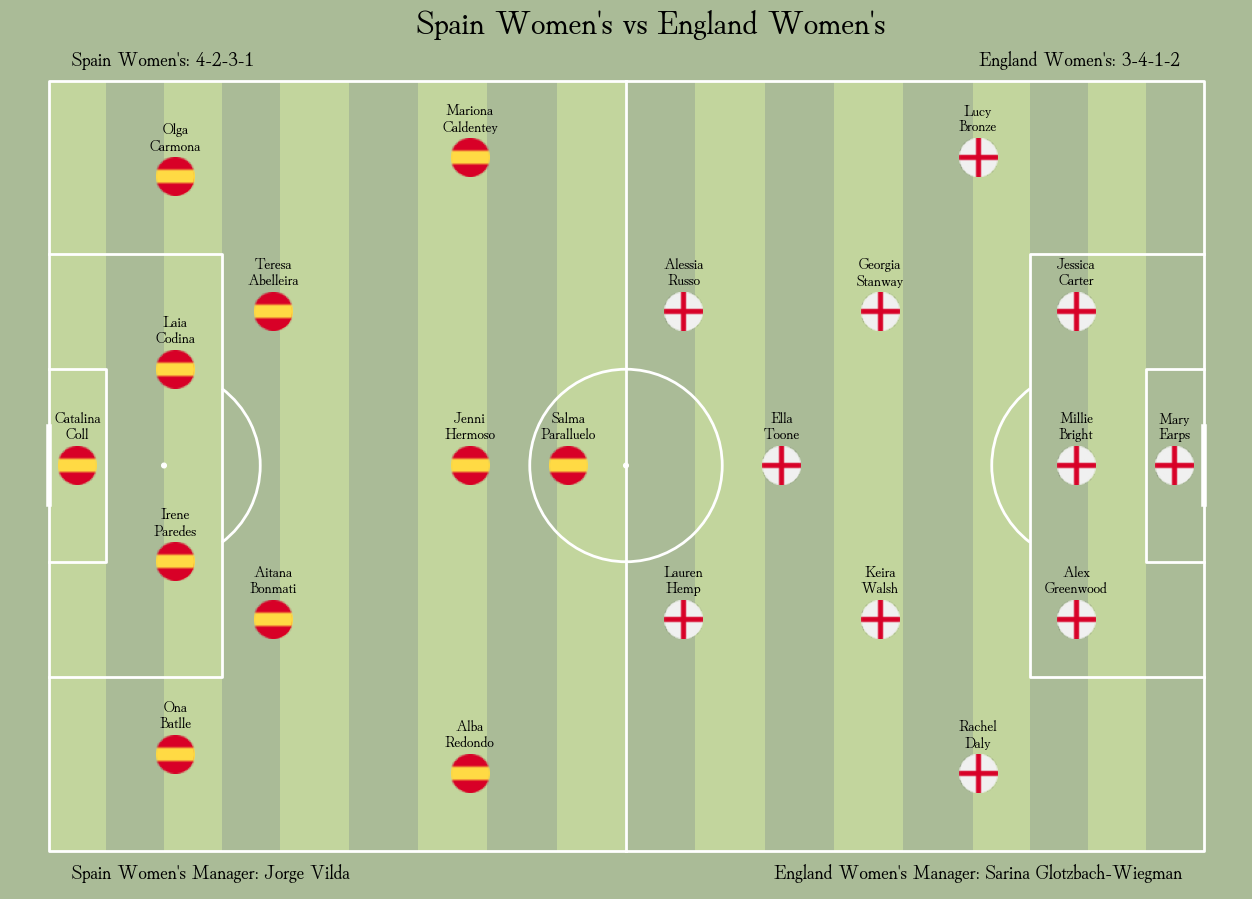

In [10]:
import matplotlib as mp
from mplsoccer import VerticalPitch, Sbopen, FontManager, inset_image
from matplotlib.font_manager import FontProperties
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

parser = Sbopen()
roboto_bold = FontManager(
    'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf')
path_eff = [path_effects.Stroke(linewidth=3, foreground='white'),
            path_effects.Normal()]
event, related, freeze, tactics = parser.event(final_match.loc[final_match.index[0],'match_id'])
# Spain's starting players
spain_starting_xi_event = event.loc[((event['type_name'] == 'Starting XI') &
                              (event['team_name'] == "Spain Women's")), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
spain_starting_xi = tactics.merge(spain_starting_xi_event, on='id')

# replace player names with the shorter version
player_short_names = {'Catalina Thomas Coll Lluch': 'Catalina Coll',
                      'Ona Batlle Pascual': 'Ona Batlle',
                      'Irene Paredes Hernandez': 'Irene Paredes',
                      'Laia Codina Panedas': 'Laia Codina',
                      'Olga  Carmona García': 'Olga Carmona',
                      'Teresa Abelleira Dueñas': 'Teresa Abelleira',
                      'Aitana Bonmati Conca': 'Aitana Bonmati',
                      'Alba María Redondo Ferrer': 'Alba Redondo',
                      'Jennifer Hermoso Fuentes': 'Jenni Hermoso',
                      'María Francesca Caldentey Oliver': 'Mariona Caldentey',
                      "Salma Paralluelo Ayingono": "Salma Paralluelo"}

spain_starting_xi['player_name'] = spain_starting_xi['player_name'].replace(player_short_names)

spain_formation = event['tactics_formation'].iloc[0]

# England's starting players
england_starting_xi_event = event.loc[((event['type_name'] == 'Starting XI') &
                              (event['team_name'] == "England Women's")), ['id', 'tactics_formation']]
# joining on the team name and formation to the lineup
england_starting_xi = tactics.merge(england_starting_xi_event, on='id')
# Shorten Mary Earps name
england_starting_xi.loc[england_starting_xi['player_name'] == 'Mary Alexandra Earps', 'player_name'] = 'Mary Earps'

england_formation = event['tactics_formation'].iloc[1]

# custom font
font_path = 'C:/Users/Francesco/AppData/Local/Microsoft/Windows/Fonts/HinaMincho-Regular.ttf'
font_properties = FontProperties(fname=font_path)
font_properties.set_style('normal')

# Setting up the pitch
#pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_zorder=2, line_color='white')
#fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
#fig.set_facecolor('white')

# Setting up the pitch
#pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_zorder=2, line_color='white')
pitch = Pitch(pitch_type='statsbomb',pitch_color='#aabb97', line_zorder=2, line_color='white',
              stripe_color='#c2d59d', stripe=True)  # optional stripes
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('#aabb97')

players_font_size = 11
# pitch left side text
ax_text_left = pitch.formation(spain_formation, positions=spain_starting_xi.position_id, kind='text',
                          half=True, text=spain_starting_xi.player_name.str.replace(' ', '\n'),
                          yoffset=-4,va='center', ha='center', fontproperties=font_properties,fontsize=players_font_size, ax=ax)

#pitch right side
ax_text_right = pitch.formation(england_formation, positions=england_starting_xi.position_id, kind='text',
                          half=True, flip=True, text=england_starting_xi.player_name.str.replace(' ', '\n'),
                          yoffset=-4,va='center', ha='center', fontproperties=font_properties,fontsize=players_font_size, ax=ax)

# Load the Spanish flag image
spain_flag = mpimg.imread('C:/Users/Francesco/Desktop/StatsBomb/spain_flag.png')

# Spain scatter markers 
ax_scatter_spain = pitch.formation(spain_formation, positions=spain_starting_xi.position_id, kind='scatter',
                             half=True, c='red', linewidth=3, s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=0,
                             ax=ax,
                             label="Spain")

# Extract the scatter data for Spanish players
spain_positions = ax_scatter_spain.get_offsets()

# Plotting the Spanish team with flags
for (x, y) in spain_positions:
    imagebox = OffsetImage(spain_flag, zoom=1.0)  # Adjust zoom to change flag size
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Load the England flag image
england_flag = mpimg.imread('C:/Users/Francesco/Desktop/StatsBomb/england_flag.png')

# England scatter markers 
ax_scatter_england = pitch.formation(england_formation, positions=england_starting_xi.position_id, kind='scatter',
                             half=True, flip=True, c='white', linewidth=3, s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=0,
                             ax=ax,
                             label="England")

# Extract the scatter data for English players
england_positions = ax_scatter_england.get_offsets()

# Plotting the England team with flags
for (x, y) in england_positions:
    imagebox = OffsetImage(england_flag, zoom=1.0)  # Adjust zoom to change flag size
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Formatting the tactic (e.g.4231 -> 4-2-3-1)
def format_formation(formation_str):
    return '-'.join(formation_str[i:i+1] for i in range(0, len(formation_str), 1))

spain_formation_clean = format_formation(spain_formation)
england_formation_clean = format_formation(england_formation)

# Add tactical formation text
ax.text(0.05, 0.99, f'{team1}: 'f'{spain_formation_clean}', fontproperties=font_properties,fontsize=14, color='black', ha='left', va='top', transform=ax.transAxes)
ax.text(0.95, 0.99, f'{team2}: 'f'{england_formation_clean}', fontproperties=font_properties,fontsize=14, color='black', ha='right', va='top', transform=ax.transAxes)

# Add managers info
spain_manager = final_match['home_managers'].iloc[0]
england_manager = final_match['away_managers'].iloc[0]
ax.text(0.05, 0.03, f'{team1} Manager: 'f'{spain_manager}', fontproperties=font_properties,fontsize=14, color='black', ha='left', va='top', transform=ax.transAxes)
ax.text(0.62, 0.03, f'{team2} Manager: 'f'{england_manager}', fontproperties=font_properties,fontsize=14, color='black', ha='left', va='top', transform=ax.transAxes)

#plot the legend
#ax.legend(facecolor='white', handlelength=3, edgecolor='None', fontsize=14, loc='best',markerscale=0.5,framealpha=0.2)

#set title
title_txt = f'{team1} vs 'f'{team2}' 
ax_title = ax.set_title(title_txt,color='black',fontproperties=font_properties,loc='center',x=0.52,weight='bold',fontsize=24)

In [11]:
#fig.savefig('C:/Users/Francesco/Desktop/StatsBomb/Twitter-Viz/WWC-lineups.png', dpi=100, bbox_inches='tight', pad_inches=0.1)

In [12]:
# next visualization will show both teams shot attempts and goals
# each shot attempt will be represented by a circle of size proportional to the shot's xG

# split location column in x,y coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)

# get non penalty shots and goals
shots_df=events_df[(events_df.type=="Shot")]
goals_df=events_df[(events_df.type=="Shot")&(events_df.shot_outcome=="Goal")]

# get shot count for each player, include team info
shots_count=shots_df.groupby(['player','team']).size().reset_index()

#rename second column
shots_count.rename(columns={shots_count.columns[2]: "Shots Taken" }, inplace = True)
#print(shots_count)

#get goal count for each player, include team info
goals_count=goals_df.groupby(['player', 'team']).size().reset_index()
goals_count.rename(columns={goals_count.columns[2]: "Goals Scored" }, inplace = True)
#print(goals_count)

#get xG count for each player, include team info
xg_sum=shots_df.groupby(['player', 'team'])['shot_statsbomb_xg'].sum().reset_index()
#rename second column
xg_sum.rename(columns={xg_sum.columns[2]: "xG" }, inplace = True)
#round up to 2 decimal places
xg_sum['np xG']=xg_sum['xG'].round(2)

# combine dataframes
shot_stats=pd.merge(shots_count, goals_count,
                    how="outer", on=["player", "team"])

shot_stats=pd.merge(shot_stats, xg_sum,
                    how="outer", on=["player", "team"])

# add 0 where value is NaN
shot_stats=shot_stats.fillna(0)

# Converting goal values to integers
shot_stats['Goals Scored']=shot_stats['Goals Scored'].astype(int)

# get team shots 
spain_shots=shots_df[(shots_df.team==f'{team1}')]
england_shots=shots_df[(shots_df.team==f'{team2}')]

# get team goals
spain_goals = goals_df[(goals_df.team==f'{team1}')]
england_goals = goals_df[(goals_df.team==f'{team2}')]

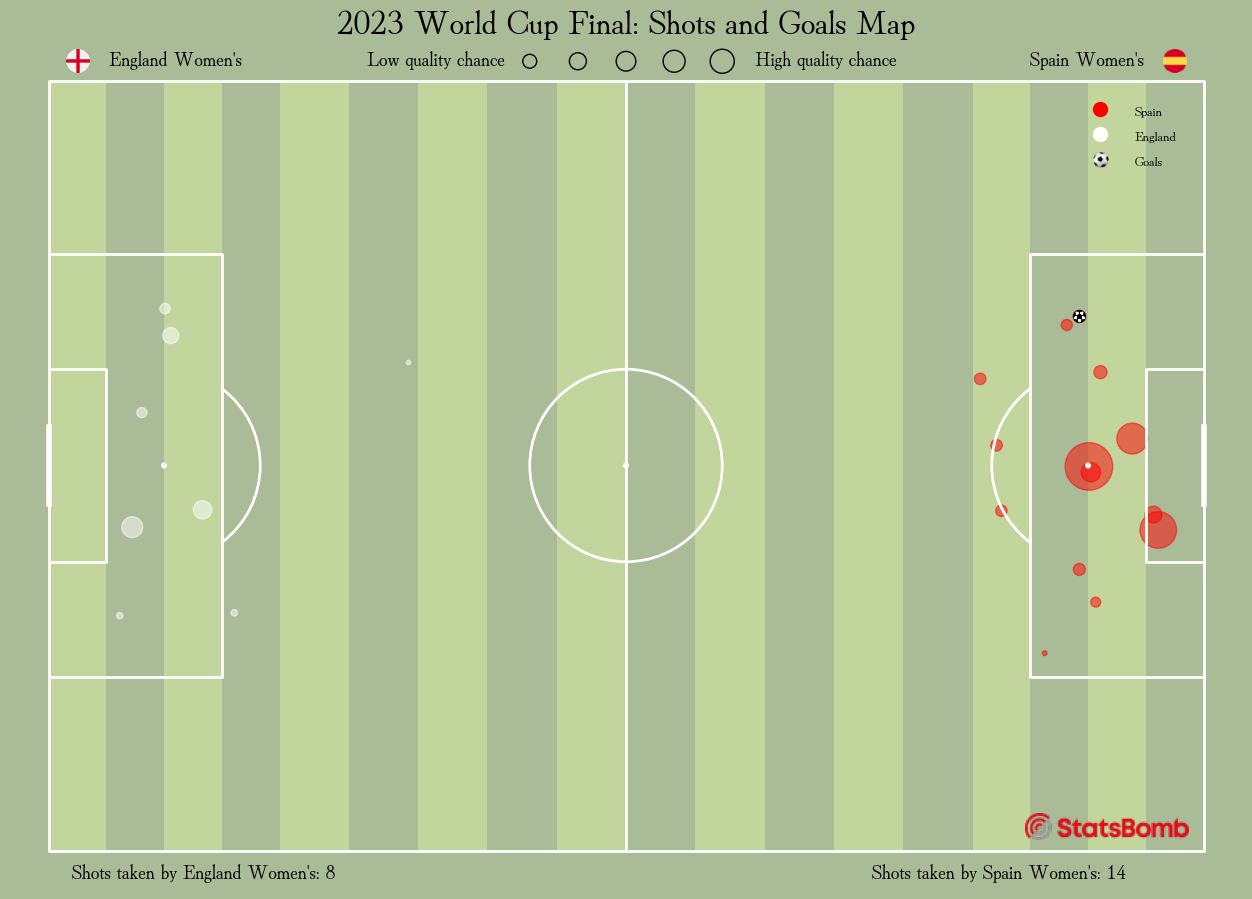

In [13]:
import matplotlib.lines as mlines
# Setting up the pitch
#pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_zorder=2, line_color='white')
pitch = Pitch(pitch_type='statsbomb',pitch_color='#aabb97', line_zorder=2, line_color='white',
              stripe_color='#c2d59d', stripe=True)  # optional stripes
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('#aabb97')

spain_shot_colour='red'
england_shot_colour='white'
goal_colour='black'
txt_color='Black'

# custom font
font_path = 'C:/Users/Francesco/AppData/Local/Microsoft/Windows/Fonts/HinaMincho-Regular.ttf'
font_properties = FontProperties(fname=font_path)
font_properties.set_style('normal')

# max dimensions for a standard StatsBomb pitch
x_max = 120  # length of the pitch
y_max = 80   # width of the pitch

circle_resize_factor = 1500

# Spain shots
spain_shots_draw = pitch.scatter(spain_shots.x, spain_shots.y,
                                 #make size relative to xG value
                                 s=spain_shots.shot_statsbomb_xg*circle_resize_factor,
                                 c=spain_shot_colour,
                                 label='Spain',
                                 marker='o',
                                 alpha=0.5,
                                 ax=ax)

# Flip the x,y coordinates for England shots to print them on the right side of the pitch (attacking side in the above visualization)
# create copies before modifying
england_shots_flipped = england_shots.copy()
england_shots_flipped.loc[:, 'x_flipped'] = x_max - england_shots_flipped['x']
england_shots_flipped.loc[:, 'y_flipped'] = y_max - england_shots_flipped['y']

# England shots
england_shots_draw = pitch.scatter(england_shots_flipped['x_flipped'], england_shots_flipped['y_flipped'],
                                   #make size relative to xG value
                                   s=england_shots.shot_statsbomb_xg*circle_resize_factor,
                                   c=england_shot_colour,
                                   label='England',
                                   marker='o',
                                   alpha=0.5,
                                   ax=ax)

# Spain goals 
spain_goals_draw = pitch.scatter(spain_goals.x, spain_goals.y,
                                 #make size relative to xG value
                                 s=spain_goals.shot_statsbomb_xg*circle_resize_factor,
                                 c='White',
                                 edgecolors=goal_colour,
                                 label='Goals',
                                 marker='football',
                                 ax=ax)

# Flip the x,y coordinates for England goals to print them on the right side of the pitch (attacking side in the above visualization)
# create copies before modifying
england_goals_flipped = england_goals.copy()
england_goals_flipped.loc[:, 'x_flipped'] = x_max - england_goals_flipped['x']
england_goals_flipped.loc[:, 'y_flipped'] = y_max - england_goals_flipped['y']

# England goals 
england_goals_draw = pitch.scatter(england_goals_flipped['x_flipped'], england_goals_flipped['y_flipped'],
                                 #make size relative to xG value
                                 s=england_goals.shot_statsbomb_xg*circle_resize_factor,
                                 c='White',
                                 edgecolors=goal_colour,
                                 label='Goals',
                                 marker='football',
                                 ax=ax)

# Count the number of shots taken by Spain
spain_shots_count = shots_df[shots_df['team'] == team1].shape[0]

# Count the number of shots taken by England
england_shots_count = shots_df[shots_df['team'] == team2].shape[0]

# Create custom legend entries
markersize = 10
spain_shots_legend = mlines.Line2D([], [], color=spain_shot_colour, marker='o', markersize=markersize, linestyle='None', label='Spain')
england_shots_legend = mlines.Line2D([], [], color=england_shot_colour, marker='o', markersize=markersize, linestyle='None', label='England')


# Custom marker for goal, with a football image 
img = mpimg.imread('C:/Users/Francesco/Desktop/StatsBomb/football_resized.png')
imagebox = OffsetImage(img, zoom=0.80)  # Adjust zoom for size
goal_marker = AnnotationBbox(imagebox,(109.3,8.3), frameon=False, pad=0, bboxprops={'edgecolor':'none'})

# Add the football image manually to the plot
ax.add_artist(goal_marker)

# Create a dummy artist to use for the legend
goal_dummy = mlines.Line2D([], [], color='none', marker='o', markersize=markersize, linestyle='None', label='Goals')
#spain_goals_legend = mlines.Line2D([], [], color='White', marker='o', markersize=markersize, linestyle='None', markeredgecolor=goal_colour, label='Goals')

# plot the legend
x_bbox = 0.9615
y_bbox = 0.95
legend = ax.legend(handles=[spain_shots_legend, england_shots_legend, goal_dummy],facecolor='white',edgecolor='None',fontsize=14,loc='upper right',bbox_to_anchor=(x_bbox,y_bbox),framealpha=0.0)
# Change the legend text color to match the color of the rest of the visualization
for text in legend.get_texts():
    text.set_color(txt_color)
    text.set_font_properties(font_properties)

ax.text(0.08, 0.99, f'{team2}', fontproperties=font_properties,fontsize=14, color=txt_color, ha='left', va='top', transform=ax.transAxes)
ax.text(0.92, 0.99, f'{team1}', fontproperties=font_properties,fontsize=14, color=txt_color, ha='right', va='top', transform=ax.transAxes)
ax.text(0.05, 0.03, f'Shots taken by {team2}: 'f'{england_shots_count}', fontproperties=font_properties,fontsize=14, color=txt_color, ha='left', va='top', transform=ax.transAxes)
ax.text(0.70, 0.03, f'Shots taken by {team1}: 'f'{spain_shots_count}', fontproperties=font_properties,fontsize=14, color=txt_color, ha='left', va='top', transform=ax.transAxes)
ax.text(0.29, 0.99, 'Low quality chance', fontproperties=font_properties,fontsize=14, color=txt_color,ha='left', va='top', transform=ax.transAxes)
ax.text(0.605, 0.99, 'High quality chance', fontproperties=font_properties,fontsize=14, color=txt_color,ha='left', va='top', transform=ax.transAxes)
#ax.text(0.80, 0.08, 'Source: StatsBomb Open Data', fontproperties=font_properties,fontsize=10, color=txt_color, ha='left', va='top', transform=ax.transAxes)

# StatsBomb logo
img_logo = mpimg.imread('C:/Users/Francesco/Desktop/StatsBomb/StatsBomb-Logo/StatsBomb Logo/1. Colour positive/SB - Icon Lockup - Colour positive - Resized.png')
imagebox = OffsetImage(img_logo, zoom=1.0)  # Adjust zoom for size
logo = AnnotationBbox(imagebox,(110,77.5), frameon=False, pad=0, bboxprops={'edgecolor':'none'})
ax.add_artist(logo)


# print circle size description at the top center
xG_description_pos = {
    'x': [50, 55, 60, 65, 70],
    'y': [-2, -2, -2, -2, -2]
}

df = pd.DataFrame(xG_description_pos) 

# Define the sizes (increasing from left to right)
sizes = [100, 150, 200, 250, 300]

description = pitch.scatter(xG_description_pos['x'], xG_description_pos['y'],
                            s=sizes, 
                            c='None', 
                            marker='o', 
                            edgecolors=txt_color,
                            ax=ax)

# print England's flag on the top left
imagebox = OffsetImage(england_flag, zoom=0.6)  # Adjust zoom to change flag size
ab = AnnotationBbox(imagebox, (3, -2), frameon=False)
ax.add_artist(ab)

# print Spain's flag on the top right
imagebox = OffsetImage(spain_flag, zoom=0.6)  # Adjust zoom to change flag size
ab = AnnotationBbox(imagebox, (117, -2), frameon=False)
ax.add_artist(ab)

#set title
title_txt = '2023 World Cup Final: Shots and Goals Map' 
ax_title = ax.set_title(title_txt,color=txt_color,fontproperties=font_properties,loc='center',x=0.50,weight='bold',fontsize=24)

In [14]:
#fig.savefig('C:/Users/Francesco/Desktop/StatsBomb/Twitter-Viz/WWC-ShotsMap-xG.png', dpi=100, bbox_inches='tight', pad_inches=0.1)

In [15]:
#import matplotlib.font_manager as fm

# Get a list of available fonts with full details
#fonts = fm.fontManager.ttflist

# Print font name, family, style, and weight details
#for font in sorted(fonts, key=lambda f: f.name):
#    prop = fm.FontProperties(fname=font.fname)
#    print(f"Name: {font.name}, Family: {prop.get_family()}, Style: {prop.get_style()}, Weight: {prop.get_weight()}")

In [16]:
import matplotlib.font_manager as fm

# List all fonts and their properties
fonts = fm.fontManager.ttflist
for font in fonts:
    if 'Hina Mincho Regular' in font.name:
        print(f"Name: {font.name}, Path: {font.fname}")

In [17]:
# plot the shot freeze frame of the goal
plt.style.use('ggplot')

# shot id of the goal
SHOT_ID = spain_goals['id'].iloc[0]
SHOT_ID

# lineup data
lineup = parser.lineup(final_match.loc[final_match.index[0],'match_id'])
lineup = lineup[['player_id', 'jersey_number', 'team_name']].copy()

In [18]:
freeze_frame = freeze[freeze.id == SHOT_ID].copy()
shot_event = event[event.id == SHOT_ID].dropna(axis=1, how='all').copy()

# add the jersey number
freeze_frame = freeze_frame.merge(lineup, how='left', on='player_id')

In [19]:
# subset the team shooting, and the opposition (goalkeeper/ other)
df_team1 = freeze_frame[freeze_frame.team_name == team1]
df_team2_goalkeeper = freeze_frame[(freeze_frame.team_name == team2) &
                                (freeze_frame.position_name == 'Goalkeeper')]
df_team2_other = freeze_frame[(freeze_frame.team_name == team2) &
                                 (freeze_frame.position_name != 'Goalkeeper')]

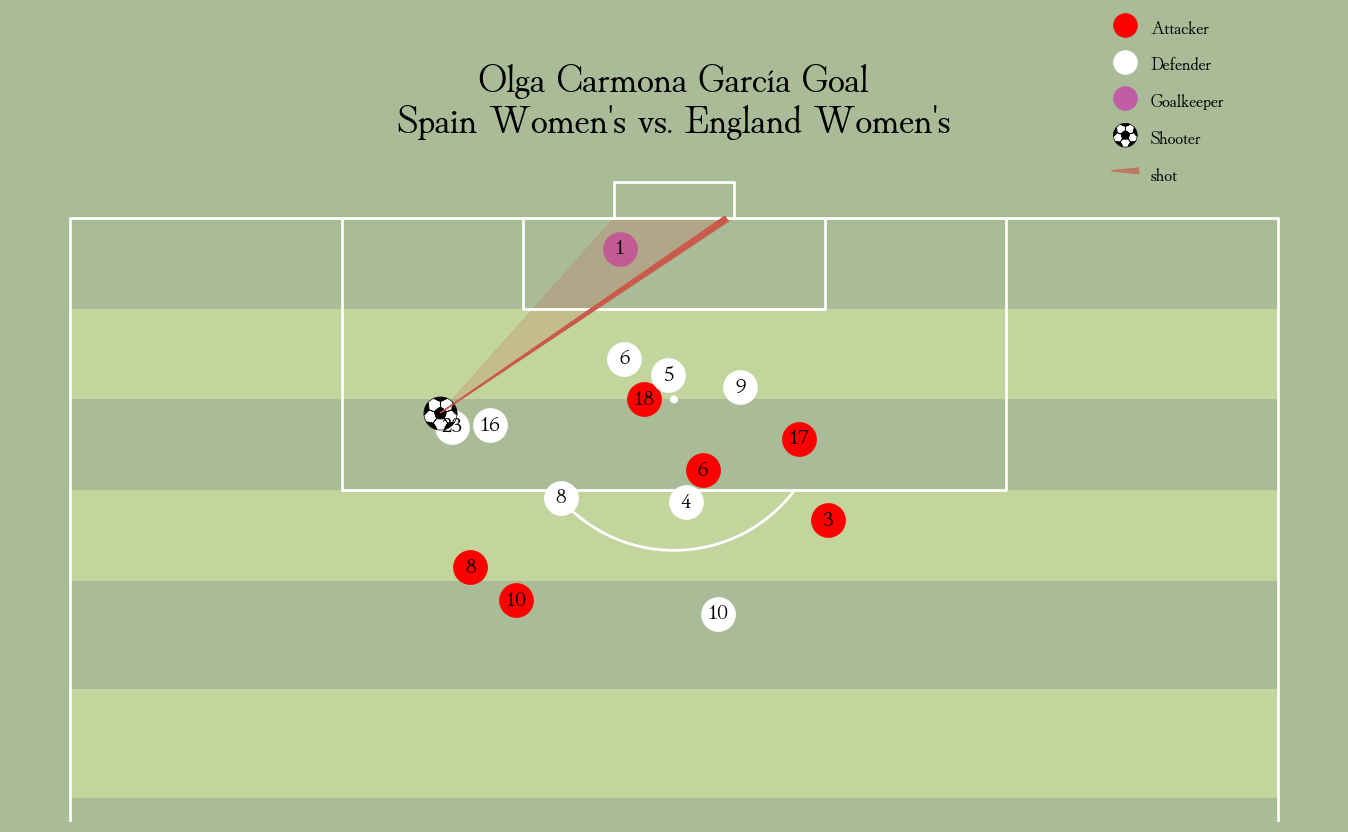

In [20]:
# Setup the pitch
pitch = VerticalPitch(half=True, goal_type='box', pad_bottom=-20,pitch_type='statsbomb',pitch_color='#aabb97', line_zorder=2, line_color='white',
              stripe_color='#c2d59d', stripe=True)

# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axs = pitch.grid(figheight=8, endnote_height=0,  # no endnote
                      title_height=0.1, title_space=0.02,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.83)
fig.set_facecolor('#aabb97')

# Plot the players
sc1 = pitch.scatter(df_team1.x, df_team1.y, s=600, c='Red', label='Attacker', ax=axs['pitch'])
sc2 = pitch.scatter(df_team2_other.x, df_team2_other.y, s=600,
                    c='White', label='Defender', ax=axs['pitch'])
sc4 = pitch.scatter(df_team2_goalkeeper.x, df_team2_goalkeeper.y, s=600,
                    ax=axs['pitch'], c='#c15ca5', label='Goalkeeper')

# plot the shot
sc3 = pitch.scatter(shot_event.x, shot_event.y, marker='football',
                    s=600, ax=axs['pitch'], label='Shooter', zorder=1.2)
line = pitch.lines(shot_event.x, shot_event.y,
                   shot_event.end_x, shot_event.end_y, comet=True,
                   label='shot', color='#cb5a4c', ax=axs['pitch'])

# plot the angle to the goal
pitch.goal_angle(shot_event.x, shot_event.y, ax=axs['pitch'], alpha=0.2, zorder=1.1,
                 color='#cb5a4c', goal='right')

# plot the jersey numbers
for i, label in enumerate(freeze_frame.jersey_number):
    pitch.annotate(label, (freeze_frame.x[i], freeze_frame.y[i]),
                   va='center', ha='center', color='Black',
                   fontproperties=font_properties, fontsize=15, ax=axs['pitch'])

# add a legend and title

legend = axs['pitch'].legend(loc='best', labelspacing=1.5,framealpha=0.0,bbox_to_anchor=(0.82,0.95),markerscale=0.7)
for text in legend.get_texts():
    text.set_fontproperties(font_properties)
    text.set_fontsize(13)
    text.set_va('center')

# title
# the player name has a double space, cleaning it to improve the visualization quality
player_name = shot_event.player_name.iloc[0]
cleaned_name = player_name.replace("  ", " ")
axs['title'].text(0.5, 0.5, f'{cleaned_name} Goal\n{team1} vs. {team2}',
                  va='center', ha='center', color='black',
                  fontproperties=font_properties, fontsize=28)

plt.show() 

In [21]:
#fig.savefig('C:/Users/Francesco/Desktop/StatsBomb/Twitter-Viz/freeze-frame-goal.png', dpi=100, bbox_inches='tight', pad_inches=0.1)

In [22]:
# Passing Network
import numpy as np
import pandas as pd
from matplotlib.colors import to_rgba

In [23]:
# Adding on the last tactics id and formation for the team for each event

event.loc[event.tactics_formation.notnull(), 'tactics_id'] = event.loc[event.tactics_formation.notnull(), 'id']
event[['tactics_id', 'tactics_formation']] = event.groupby('team_name')[['tactics_id', 'tactics_formation']].ffill()

In [24]:
# Add the abbreviated player position to the players dataframe

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
spain_starting_xi['position_abbreviation'] = spain_starting_xi.position_id.map(formation_dict)
spain_starting_xi

,jersey_number,match_id,id,player_id,player_name,position_id,position_name,event_tactics_id,tactics_formation,position_abbreviation
0,23,3906390,73d302be-c474-47b0-b465-d276046f96a5,45295,Catalina Coll,1,Goalkeeper,1,4231,GK
1,2,3906390,73d302be-c474-47b0-b465-d276046f96a5,46639,Ona Batlle,2,Right Back,2,4231,RB
2,4,3906390,73d302be-c474-47b0-b465-d276046f96a5,10165,Irene Paredes,3,Right Center Back,3,4231,RCB
3,14,3906390,73d302be-c474-47b0-b465-d276046f96a5,32694,Laia Codina,5,Left Center Back,4,4231,LCB
4,19,3906390,73d302be-c474-47b0-b465-d276046f96a5,49836,Olga Carmona,6,Left Back,5,4231,LB
5,3,3906390,73d302be-c474-47b0-b465-d276046f96a5,49835,Teresa Abelleira,11,Left Defensive Midfield,6,4231,LDM
6,6,3906390,73d302be-c474-47b0-b465-d276046f96a5,15284,Aitana Bonmati,13,Right Center Midfield,7,4231,RCM
7,17,3906390,73d302be-c474-47b0-b465-d276046f96a5,50151,Alba Redondo,17,Right Wing,8,4231,RW
8,10,3906390,73d302be-c474-47b0-b465-d276046f96a5,10151,Jenni Hermoso,19,Center Attacking Midfield,9,4231,CAM
9,8,3906390,73d302be-c474-47b0-b465-d276046f96a5,10161,Mariona Caldentey,21,Left Wing,10,4231,LW


In [25]:
# Add on the subsitutions to the players dataframe, i.e. where players are subbed on but the formation doesn’t change

sub = event.loc[event.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
players_sub = spain_starting_xi.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([spain_starting_xi, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]

In [26]:
# add on the position the player was playing in the formation to the event dataframe
event = event.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
# add on the position the receipient was playing in the formation to the events dataframe
event = event.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                                     how='left', validate='m:1', suffixes=['', '_receipt'])

In [27]:
# Show the formations used in the match

event.groupby('team_name').tactics_formation.unique()

team_name
England Women's    [3412, 4231]
Spain Women's       [4231, 433]
Name: tactics_formation, dtype: object

In [28]:
FORMATION = '4231'
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
passes_formation = event.loc[(event.team_name == team1) & (event.type_name == 'Pass') &
                              (event.tactics_formation == FORMATION) &
                              (event.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = event.loc[(event.team_name == team1) &
                               (event.type_name.isin(['Pass', 'Ball Receipt'])) &
                               (event.tactics_formation == FORMATION), location_cols].copy()

# average locations
average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

# calculate the number of passes between each position (using min/ max so we get passes both ways)
passes_formation['pos_max'] = (passes_formation[['position_abbreviation','position_abbreviation_receipt']].max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation','position_abbreviation_receipt']].min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

# add on the location of each player so we have the start and end positions of the lines
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])

In [29]:
# Calculate the line width and marker sizes relative to the largest counts

MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 2500

passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

In [30]:
# Set color to make the lines more transparent when fewer passes are made

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

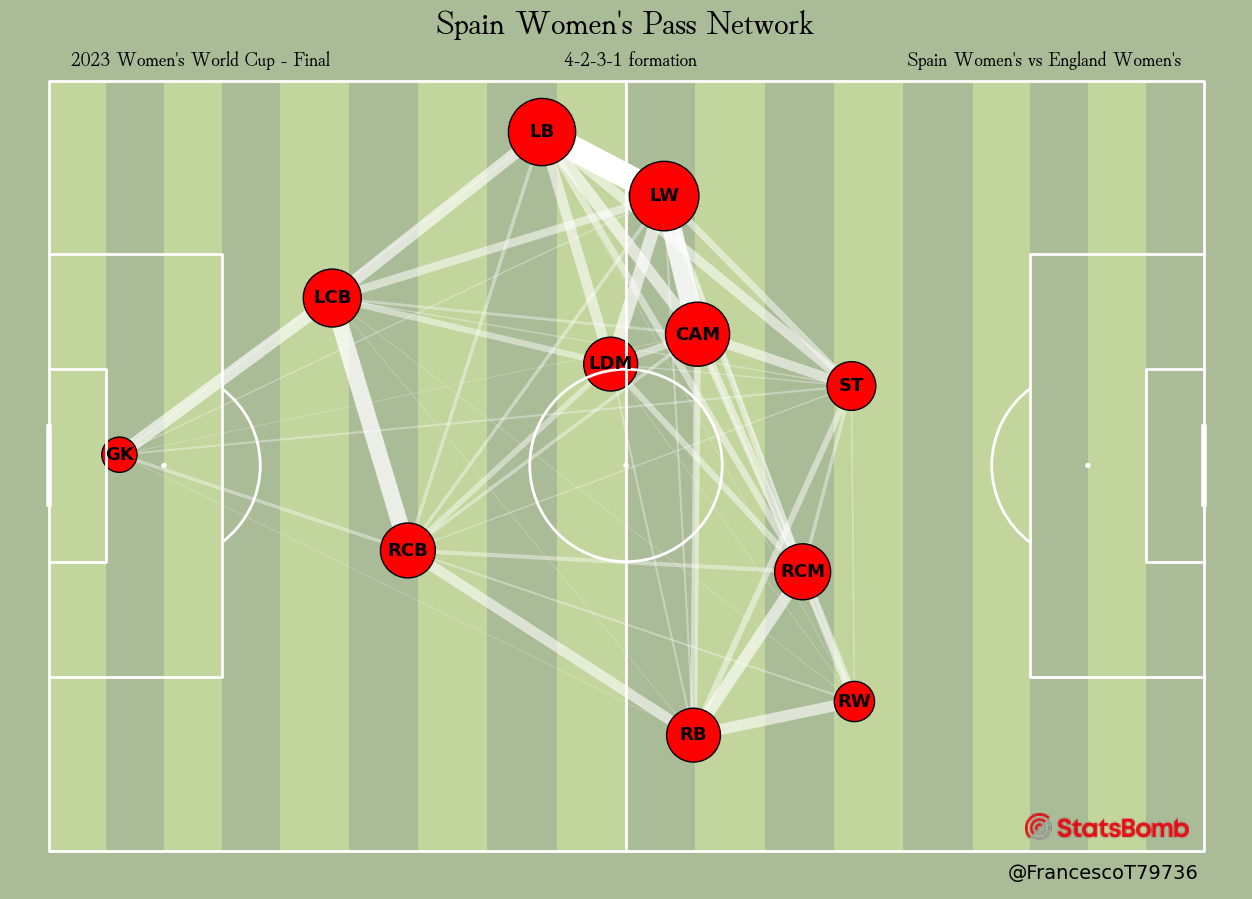

In [50]:
# Plotting
pitch = Pitch(pitch_type='statsbomb', pitch_color='#aabb97', line_zorder=2, line_color='white',
              stripe_color='#c2d59d', stripe=True)  # optional stripes
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#aabb97')

txt_color = 'Black'
FORMATION = '4-2-3-1'

pass_lines = pitch.lines(passes_between.x, passes_between.y,
                         passes_between.x_end, passes_between.y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c=txt_color, va='center',
                   ha='center', size=13, weight='bold', ax=ax)

# Add Twitter handle as a clickable link
twitter_handle = '@FrancescoT79736'
ax.text(0.81, 0.03, twitter_handle, url='https://x.com/FrancescoT79736',
        fontsize=14, color='Black', ha='left', va='top', transform=ax.transAxes)

# Set title
competition = "2023 Women's World Cup - Final"
title_txt = f'{team1} Pass Network'
ax_title = ax.set_title(title_txt, color=txt_color, fontproperties=font_properties,
                        loc='center', x=0.50, weight='bold', fontsize=24)

ax.text(0.45, 0.99, f'{FORMATION} formation', fontproperties=font_properties, fontsize=14,
        color=txt_color, ha='left', va='top', transform=ax.transAxes)
ax.text(0.26, 0.99, f'{competition}', fontproperties=font_properties, fontsize=14,
        color=txt_color, ha='right', va='top', transform=ax.transAxes)
ax.text(0.95, 0.99, f'{team1} vs {team2}', fontproperties=font_properties, fontsize=14,
        color=txt_color, ha='right', va='top', transform=ax.transAxes)

# StatsBomb logo (logo positioning code)
img_logo = mpimg.imread('C:/Users/Francesco/Desktop/StatsBomb/StatsBomb-Logo/StatsBomb Logo/1. Colour positive/SB - Icon Lockup - Colour positive - Resized.png')
imagebox = OffsetImage(img_logo, zoom=1.0)
logo = AnnotationBbox(imagebox, (110, 77.5), frameon=False, pad=0, bboxprops={'edgecolor': 'none'})
ax.add_artist(logo)

# Save the figure as an SVG
fig.savefig('C:/Users/Francesco/Desktop/StatsBomb/Twitter-Viz/WWC-Passing-Network.svg', format='svg', bbox_inches='tight')

# Show the plot (non-interactive version)
plt.show()

In [32]:
#fig.savefig('C:/Users/Francesco/Desktop/StatsBomb/LinkedIn-Viz/WWC-Passing-Network.png', dpi=150, bbox_inches='tight', format='png',pad_inches=0.1)
#fig.savefig('C:/Users/Francesco/Desktop/StatsBomb/Twitter-Viz/WWC-Passing-Network.png', dpi=100, bbox_inches='tight', format='png',pad_inches=0.1)
#fig.savefig('C:/Users/Francesco/Football Analysis/Visuals/WWC-Passing-Network.png', dpi=100, bbox_inches='tight', format='png',pad_inches=0.1)

In [52]:
fig.savefig('C:/Users/Francesco/Football Analysis/Visuals/WWC-Passing-Network.svg', dpi=150, bbox_inches='tight', format='svg',pad_inches=0.1)
fig.savefig('C:/Users/Francesco/Football Analysis/Visuals/WWC-Passing-Network.png', dpi=100, bbox_inches='tight', format='png',pad_inches=0.1)